# EDA  Household Power Consumption

In [47]:
# load libraries
# %pip install numpy pandas matplotlib seaborn

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# load dataset
df = pd.read_csv('../data/household_power_consumption.txt', 
                sep=';',
                low_memory=False)


KeyboardInterrupt: 

In [ ]:
# first entries
df.head()  

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Dataset composition

This data set has the following columns:
1. **date:** Date in format dd/mm/yyyy
2. **time:** time in format hh:mm:ss
3. **global_active_power:** household global minute-averaged active power (in kilowatt)
4. **global_reactive_power:** household global minute-averaged reactive power (in kilowatt)
5. **voltage:** minute-averaged voltage (in volt)
6. **global_intensity:** household global minute-averaged current intensity (in ampere)
7. **sub_metering_1:** energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. **sub_metering_2:** energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. **sub_metering_3:** energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [ ]:
# print number of rows and columns
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 2075259
Number of columns: 9


In [ ]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Data Cleaning

We merge the **Date** and **Time** columns are merged into **Datetime** following a YYYY-MM-DD HH:MM:SS format. 

Empty data gets cleaned

In [ ]:
import importlib
import sys
sys.path.append('../')
from src import processing
importlib.reload(processing)

df_cleaned = processing.clean_data(df)
df_cleaned.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


# Univariate analysis

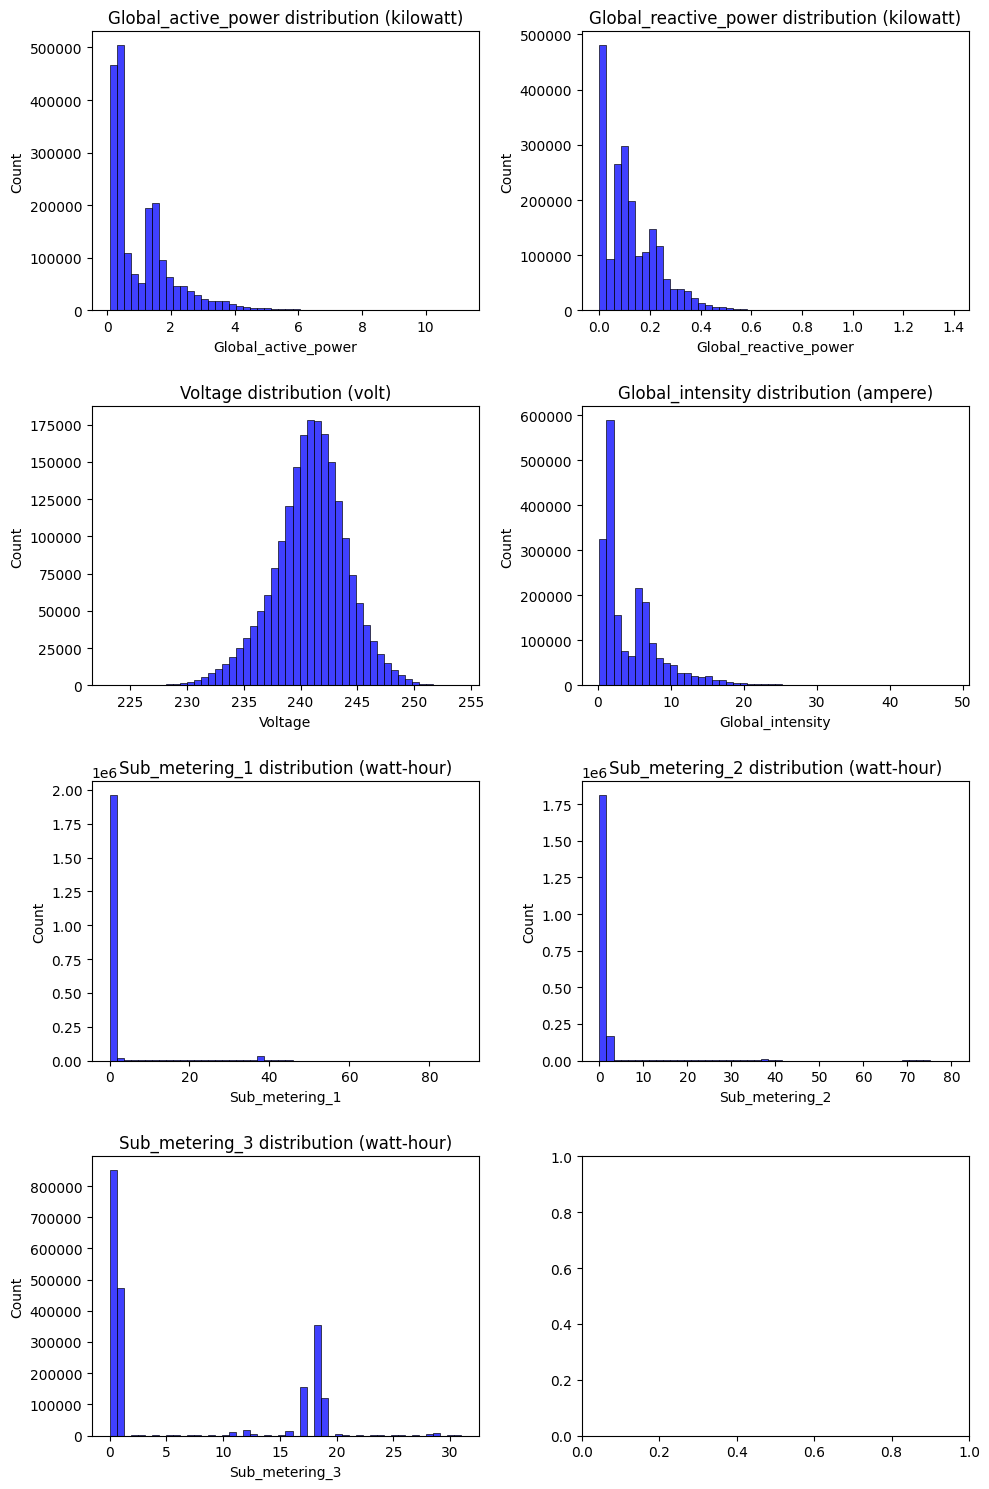

In [ ]:

# 1. HISTPLOTS
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
axes = axes.flatten()

cols = df_cleaned.copy()
cols = cols.columns.drop("Datetime")
measure_units = ["kilowatt", "kilowatt", "volt", "ampere", "watt-hour", "watt-hour", "watt-hour"]

for i, col in enumerate(cols):
    sns.histplot(
        df_cleaned[col], 
        color="blue", 
        label=col, 
        bins=50, 
        ax=axes[i],
    )
    
    # title
    axes[i].set_title(f"{col} distribution ({measure_units[i]})", fontsize=12)

plt.tight_layout() 
plt.show()

### Distribution analysis

Both the active and reactive global power exhibit distributions with multiple peaks (bimodal or trimodal), skewed to the left, indicating that the household operates in distinct power consumption states—likely corresponding to low activity (e.g., nighttime or unoccupied periods), moderate activity (e.g., daytime routines), and high activity (e.g., cooking or multiple appliances). The exponential decay after the peaks suggests that extreme high consumption is rare. Notably, global active power values are generally higher than reactive power, as reactive power represents energy that doesn't perform useful work and is "lost" in the system.

The voltage distribution approximates a normal (Gaussian) curve centered around 240V, aligning with standard household voltage in many regions. This stability indicates consistent electrical supply, with minimal deviations that could signal issues like power surges or drops.

Global intensity mirrors the patterns of active and reactive power, as it is directly proportional to power consumption under constant voltage (P = V * I for active power).

The sub-metering distributions (Sub_metering_1, 2, and 3) lack clear patterns, appearing more uniform or scattered. This reflects their sporadic usage tied to specific appliances: Sub_metering_1 (kitchen) spikes during meals, Sub_metering_2 (laundry) during chores, and Sub_metering_3 (water heating and AC) during comfort needs. Statistical summaries reveal that Sub_metering_3 has the highest variability, likely due to seasonal and daily temperature fluctuations.

# Time analysis


In [ ]:
# Set index with datetime
df_cleaned = df_cleaned.set_index('Datetime')

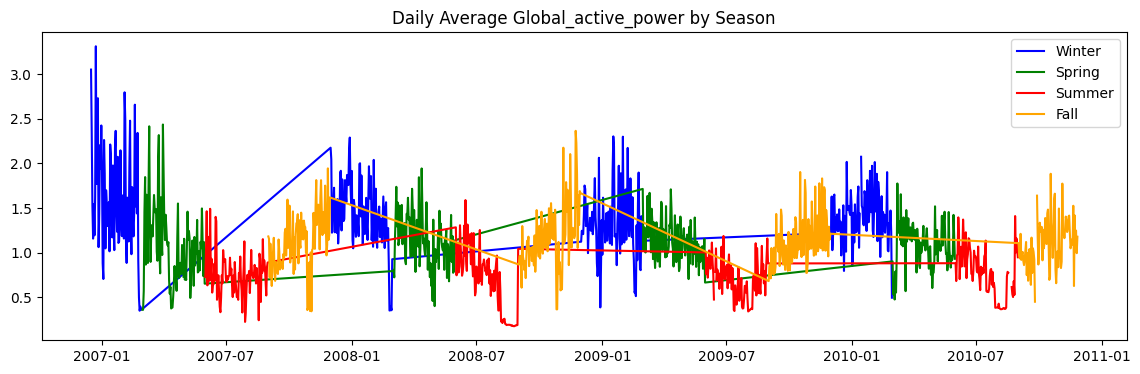

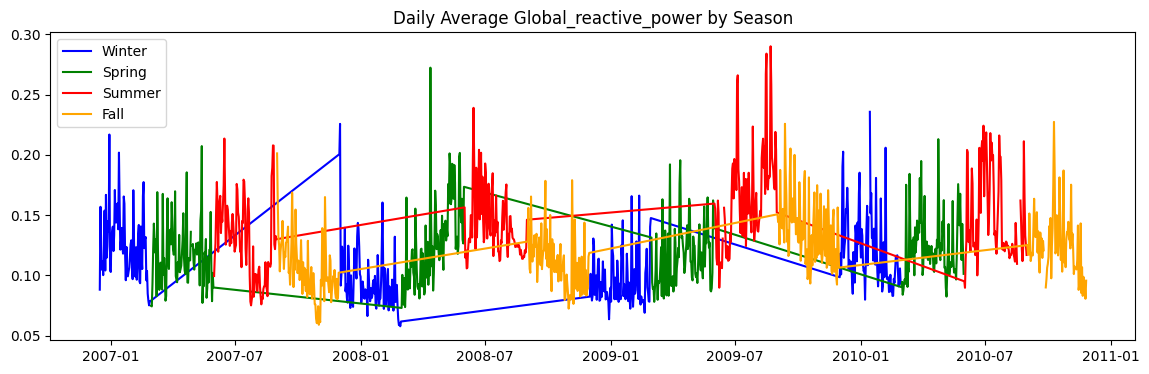

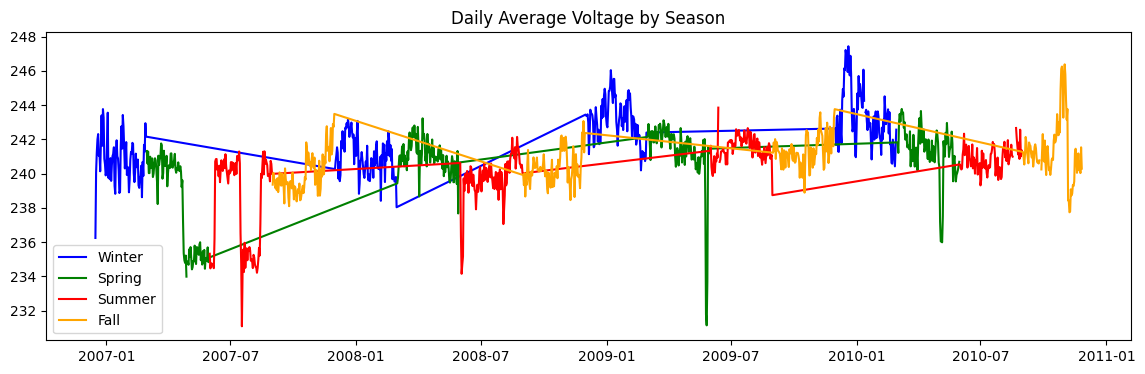

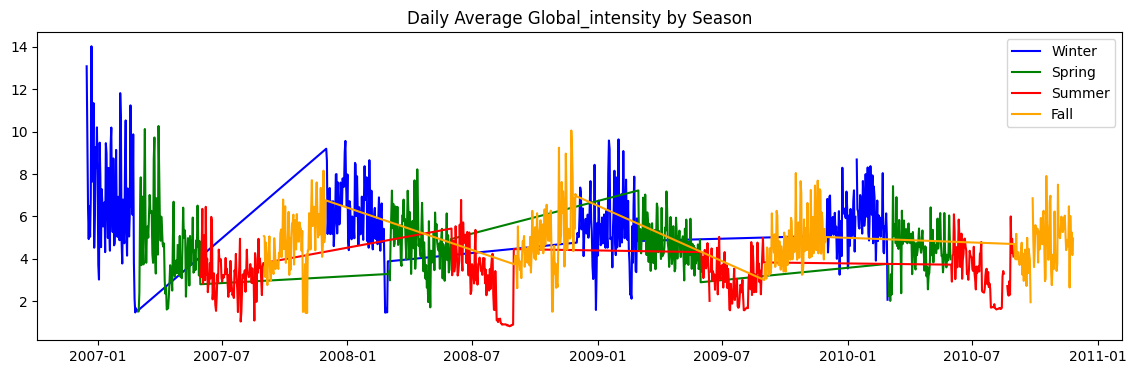

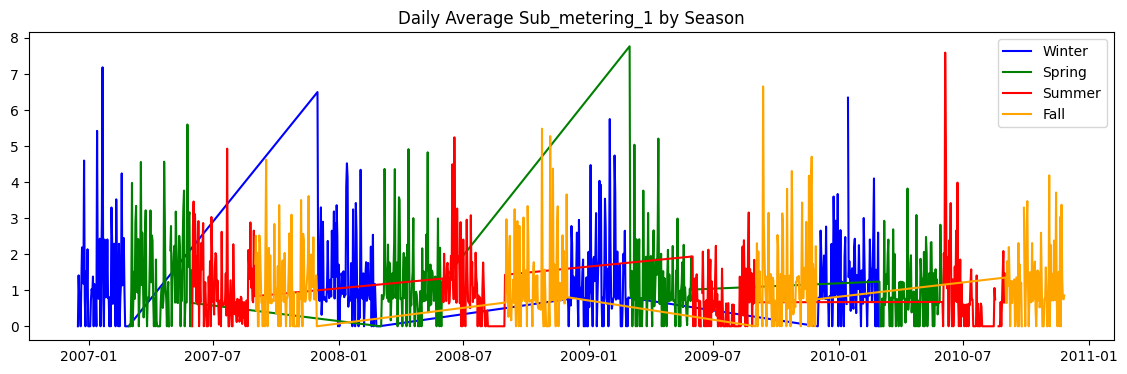

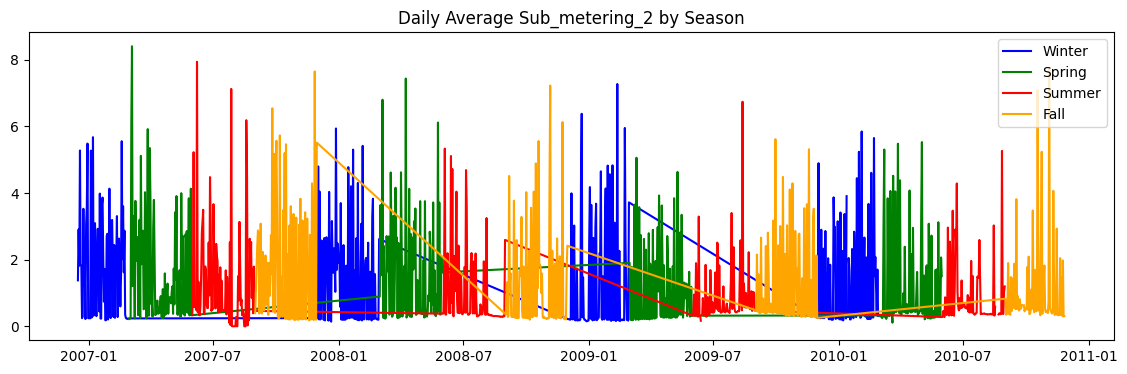

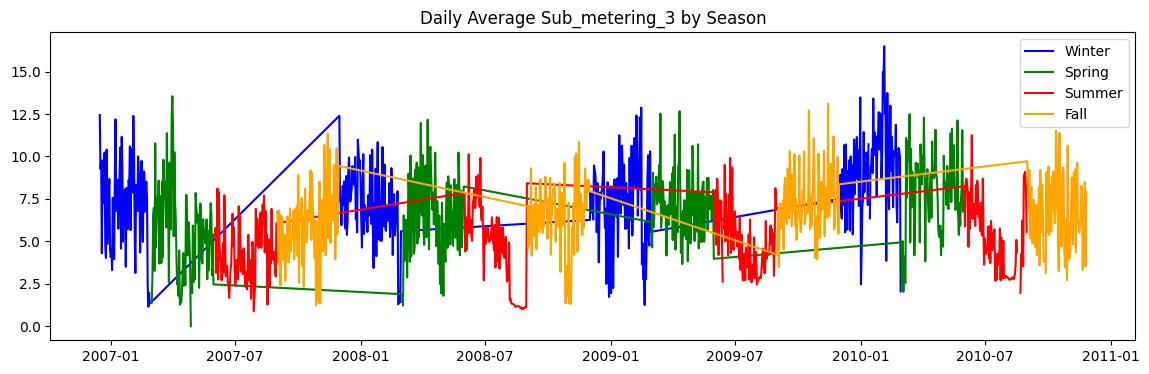

In [ ]:
hourly = df_cleaned.resample('d').mean()

# Add season column for background coloring
hourly['season'] = hourly.index.month.map(lambda m: 'Winter' if m in [12,1,2] else 'Spring' if m in [3,4,5] else 'Summer' if m in [6,7,8] else 'Fall')

# Define light colors for seasons
light_colors = {'Winter': 'lightblue', 'Spring': 'lightgreen', 'Summer': 'lightcoral', 'Fall': 'wheat'}

import matplotlib.dates as mdates

for col in hourly.columns:
    if col != 'season':  # Skip the season column itself
        plt.figure(figsize=(16,4))
        # Add background colors for seasons
        for year in range(hourly.index.min().year, hourly.index.max().year + 1):
            for season, months in [('Winter', [12,1,2]), ('Spring', [3,4,5]), ('Summer', [6,7,8]), ('Fall', [9,10,11])]:
                for month in months:
                    start = pd.Timestamp(year, month, 1)
                    end = pd.Timestamp(year, month, mdates.monthrange(year, month)[1])
                    start = max(start, hourly.index.min())
                    end = min(end, hourly.index.max())
                    if start <= end:
                        plt.axvspan(start, end, color=light_colors[season], alpha=0.3)
        # Plot the line in black
        plt.plot(hourly.index, hourly[col], color='black')
        plt.title(f"Daily Average {col}")
        plt.show()

### Time analysis

The daily average plots, now with light seasonal background colors (Winter: light blue, Spring: light green, Summer: light coral, Fall: wheat) and a black line, reveal clear seasonal patterns in power consumption. Global active power and global intensity both decline during July (Northern Hemisphere summer) and peak in January (winter), reflecting behavioral adaptations to weather: reduced heating/cooling needs in summer lower overall energy use, while winter demands for lighting, heating, and hot water drive higher consumption. This seasonal variation underscores the impact of climate on household energy habits.

Reactive power shows an inverse trend, potentially due to inefficiencies in the electrical grid during low-demand periods, where more power is lost as reactive energy. Alternatively, it could indicate compensatory mechanisms in appliances during off-peak times.

Voltage remains stable around 240V, with a notable dip around July 2007 that may represent an anomaly, such as maintenance or external grid issues, warranting further investigation into external factors.

Sub_metering_3 (water heating and air conditioning) follows the seasonal pattern closely, peaking in winter for heating and summer for cooling, highlighting its sensitivity to temperature. In contrast, Sub_metering_1 and 2 show less pronounced seasonal trends, as kitchen and laundry activities are more routine and less weather-dependent. Overall, these patterns suggest opportunities for energy efficiency interventions, such as smart thermostats or appliance scheduling, to mitigate winter peaks.

### Means per hour

Average of the data grouping by hour, keeping in consideration the outliers

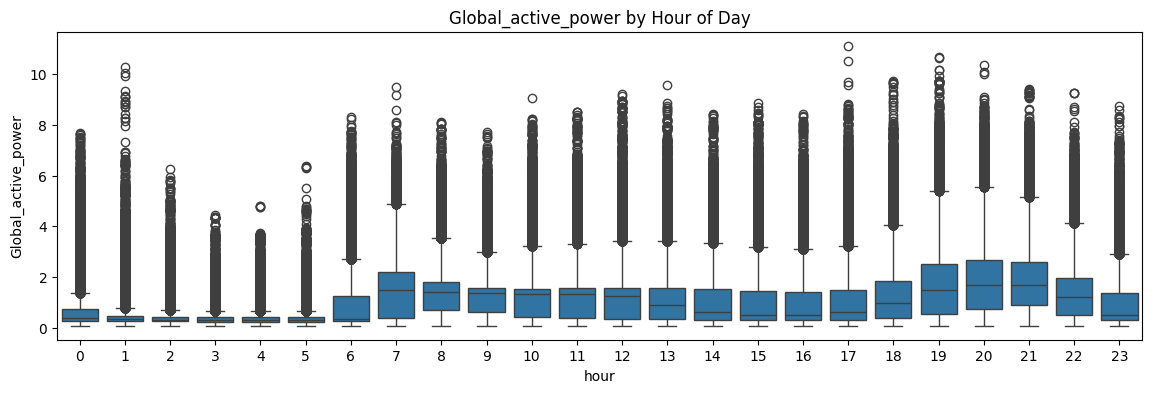

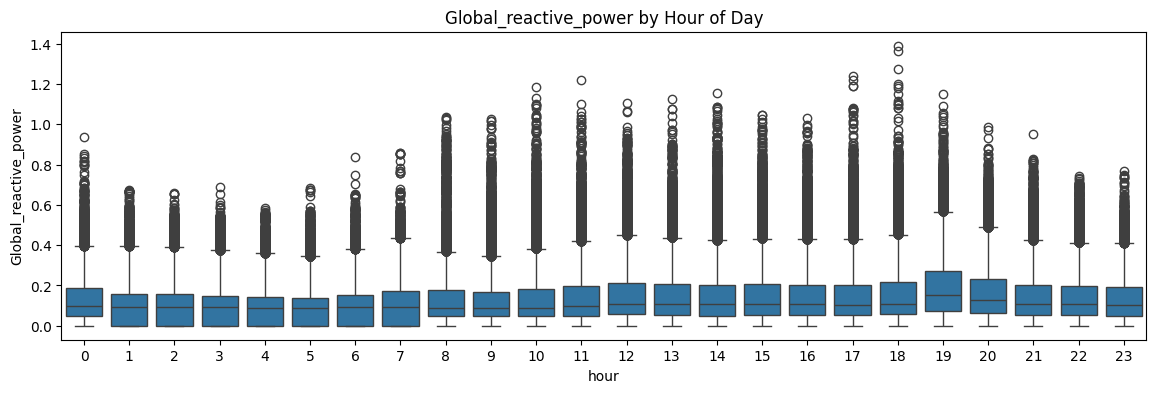

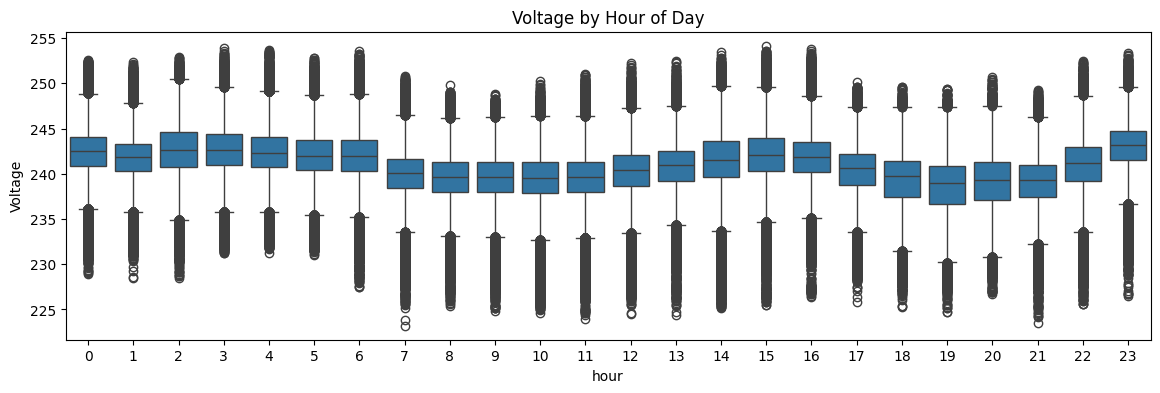

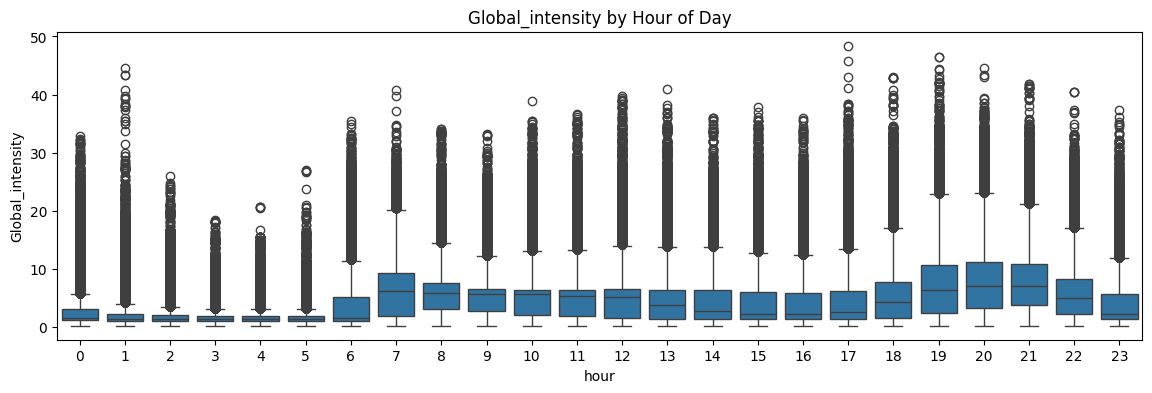

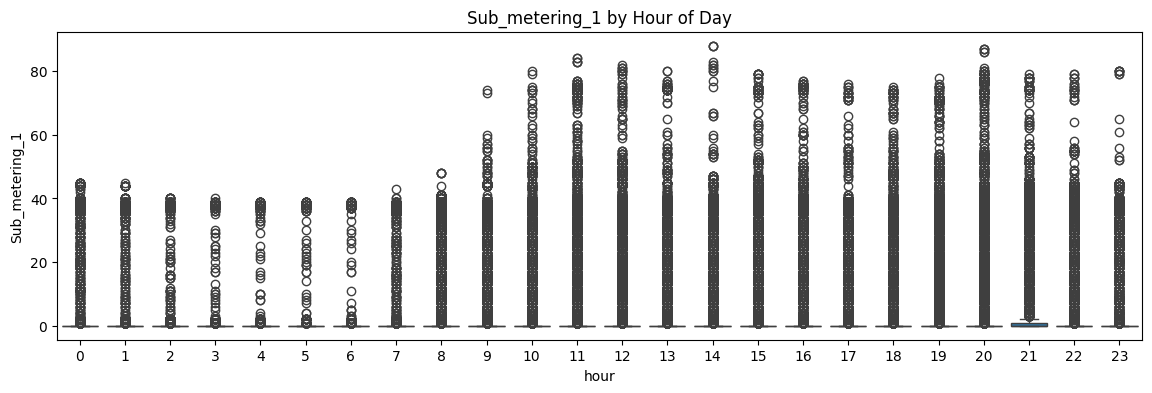

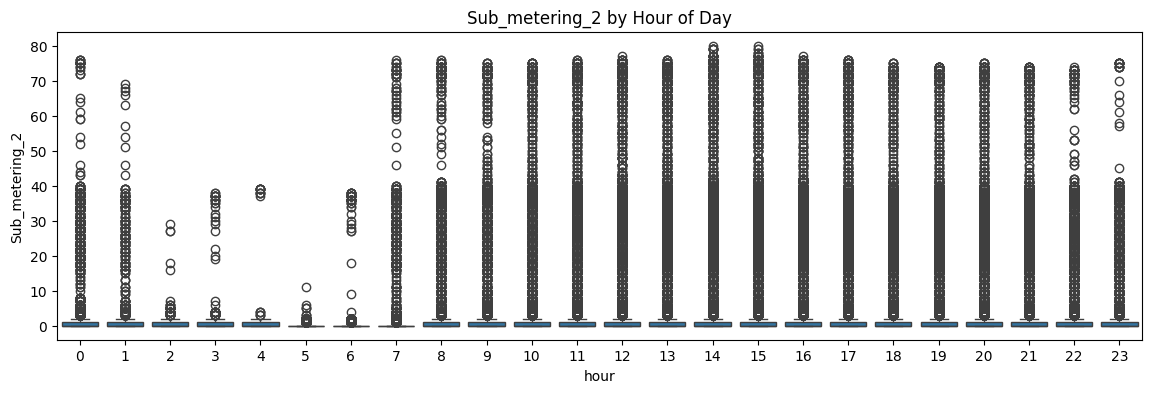

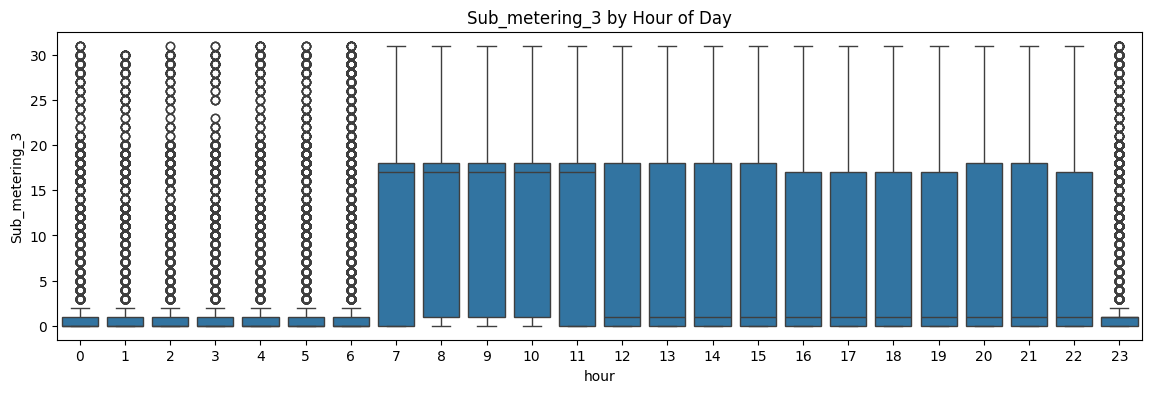

In [ ]:
df_cleaned_2 = df_cleaned.copy()
df_cleaned_2["hour"] = df_cleaned_2.index.hour

for col in df_cleaned_2.columns:
    if col != "hour":
        plt.figure(figsize=(14,4))
        sns.boxplot(x="hour", y=col, data=df_cleaned_2)
        plt.title(f"{col} by Hour of Day")
        plt.show()

### Taking out the outliers

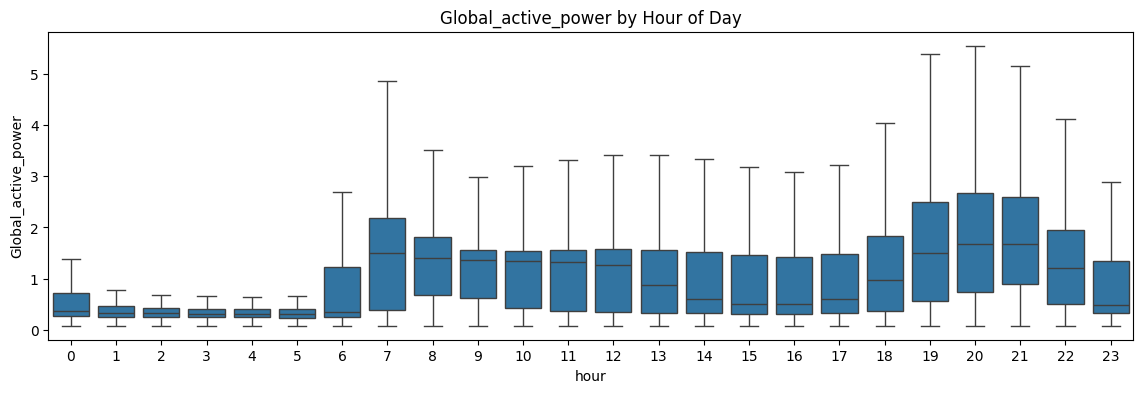

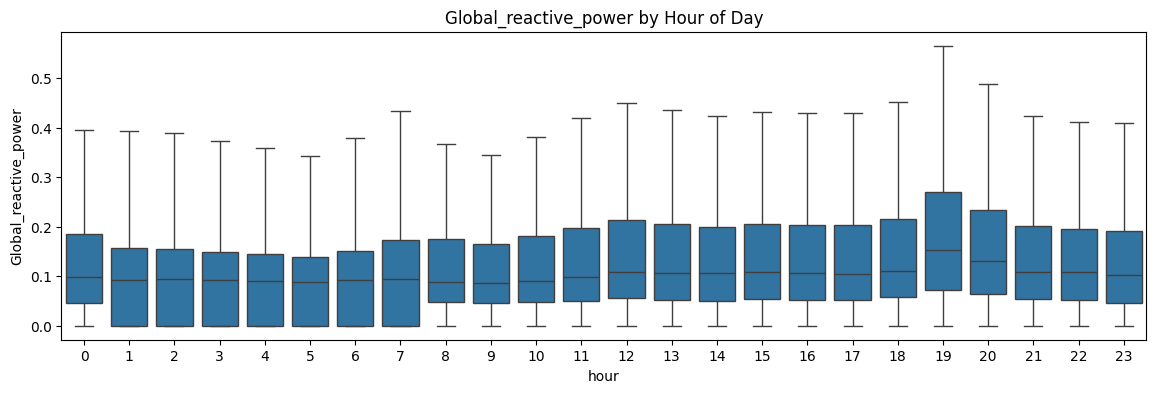

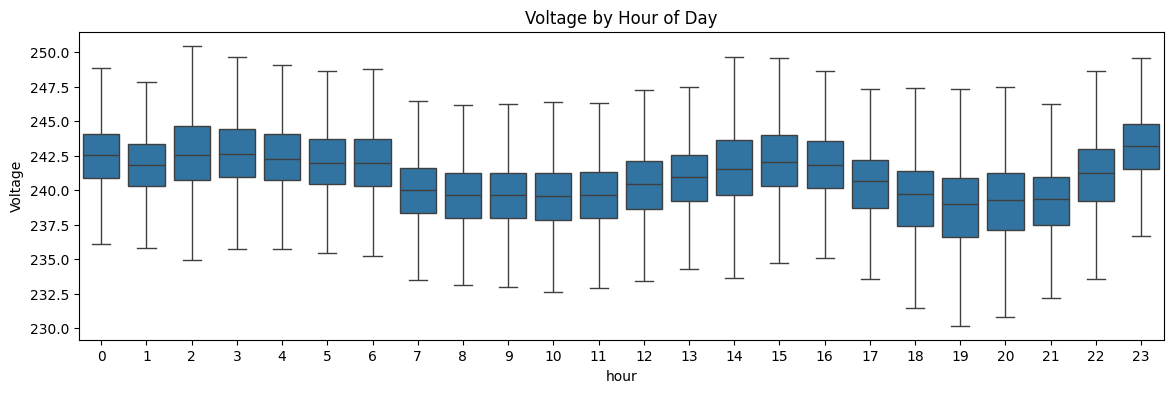

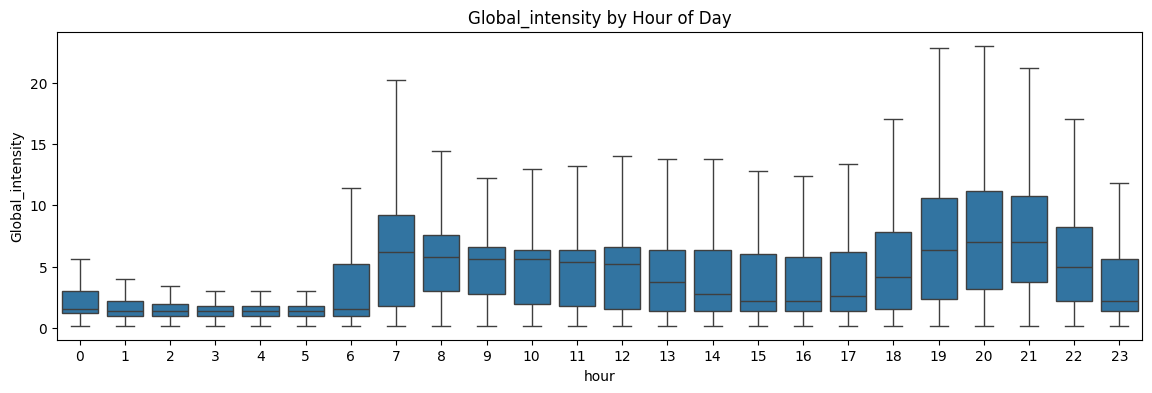

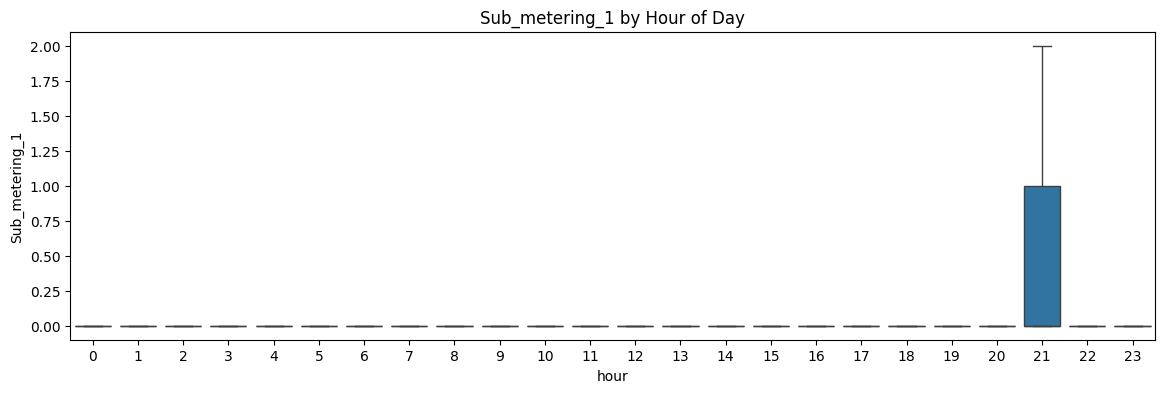

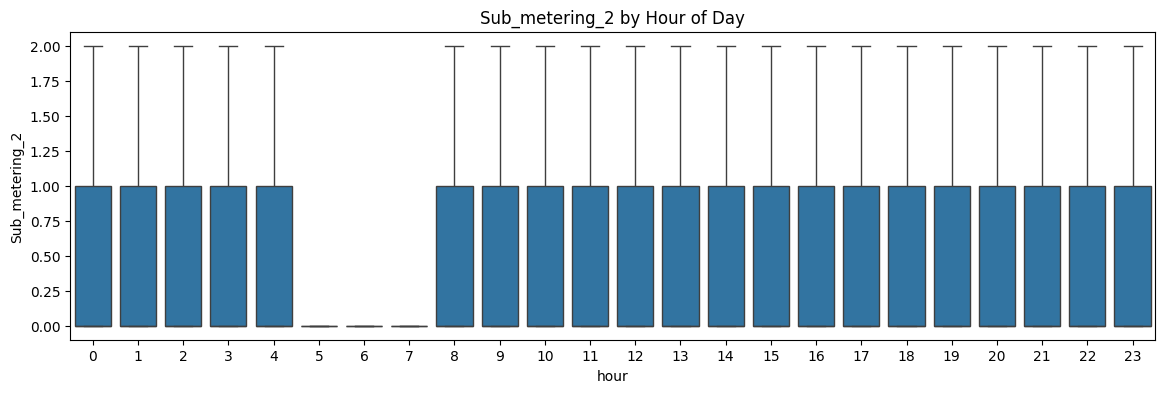

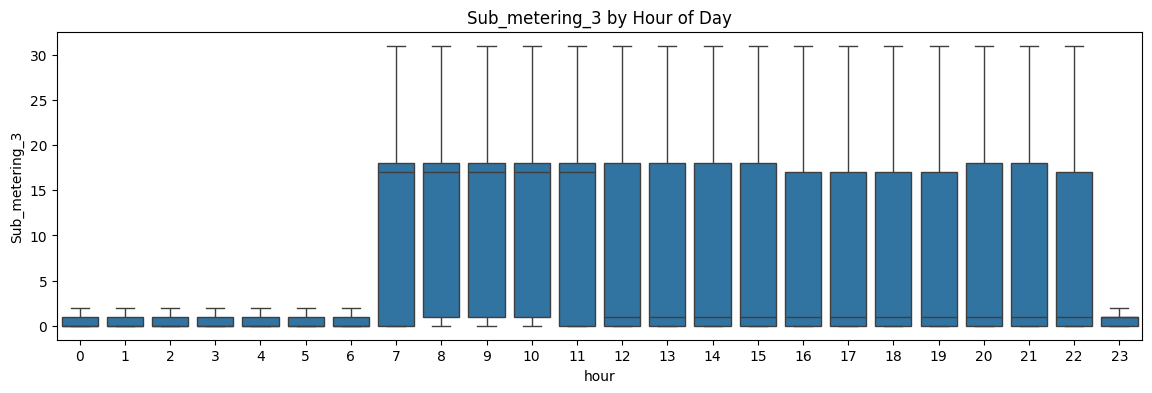

In [ ]:
for col in df_cleaned_2.columns:
    if col != "hour":
        plt.figure(figsize=(14,4))
        sns.boxplot(x="hour", y=col, 
                    data=df_cleaned_2,
                    showfliers=False)
        plt.title(f"{col} by Hour of Day")
        plt.show()

#### Boxplots analysis

#### Boxplots analysis

The boxplots for global active power and global intensity reveal higher median consumption during morning hours (6-9 AM) and early evening (5-8 PM), aligning with typical household routines like breakfast preparation, commuting, and dinner activities. Nighttime hours (midnight to 5 AM) show the lowest consumption, consistent with sleep periods and reduced appliance use. This diurnal pattern emphasizes the role of human behavior in energy demand.

Voltage exhibits significant oscillation throughout the day, but consistently centers around 240V, indicating reliable grid performance. However, slight increases during peak hours might reflect higher load stresses on the system.

Sub_metering_3 (water heating and air conditioning) peaks prominently during daytime hours (10 AM to 6 PM), when household occupants are likely active and temperature regulation is needed. This contrasts with Sub_metering_1 (kitchen) and Sub_metering_2 (laundry), which show more sporadic spikes, often in the morning and evening, tied to meal times and chore schedules. Reactive power and voltage show less hourly variation, suggesting they are more influenced by external grid factors than daily habits.

Removing outliers highlights the core consumption patterns, revealing that extreme values (e.g., appliance malfunctions or unusual events) do not significantly alter the overall trends. This robust analysis points to potential energy-saving strategies, such as load-shifting appliances to off-peak hours or investing in energy-efficient devices for high-usage periods.

# Conclusion

This exploratory data analysis of household power consumption data from 2006-2010 provides valuable insights into energy usage patterns. Key findings include multimodal distributions in power metrics indicating distinct consumption states, seasonal variations driven by weather and habits, and diurnal cycles peaking in mornings and evenings. Voltage stability around 240V suggests reliable supply, while sub-metering highlights appliance-specific behaviors.

Overall, the household exhibits predictable yet variable energy demands, with opportunities for efficiency improvements through behavioral changes (e.g., off-peak usage) and technological interventions (e.g., smart meters). Future analyses could incorporate external data like weather or occupancy to further refine these insights and inform sustainable energy practices.